# Workbook 7: Artificial Neural Networks 1 - Perceptrons

Overview of activities and objectives of this workbook:

1. The first part of this workbook will introduce the Perceptron algorithm for supervised learning, and the building blocks of artificial neural networks.
    - We introduce the Perceptron algorithm and you are provided a code implementation for a 2 input Perceptron.
    - We will then show Perceptrons can learn simple logical operator functions, using binary truth-table data.

2. The second part of this workbook will demonstrate Perceptron decision boundaries.
    - Perceptrons are only capable of learning linear decision boundaries.
    - This demonstrates the limitations of Perceptrons and why we might need to combine them into networks.

3. The third part of this workbook will apply the Perceptron to real valued data.
    - We will use the Iris dataset we introduced in the previous weeks.
    - Then demonstrate how you might apply a simple linear classifier to multi-class data. 

<div style="background:black;width:100%;height:10px"></div>

# Part 1: Perceptrons - The basis of Artificial Neural Networks

Perceptrons, invented by Frank Rosenblatt in the late 1950's,
are a form of supervised machine learning algorithm inspired by neuron cells.
In neurons, signals come in along the dendrites and out along the axon. 
A synapse is the connection between the axon of one cell and the dendrites of another.
Crudely, input signals are 'summed' and if they reach a certain threshold the neuron 'fires'
and sends a signal down the synapse to the connected cells.

![Perceptron](figures/Perceptron.png "Perceptron Image")

Perceptrons are an algorithmic approximation of this process and can learn to solve simple classification problems.  
Input values are multiplied by a learnable parameter called a *weight*.  
If the sum of the inputs $\times$ weights is over a certain threshold the Perceptron 'fires' and generates an output.  
We use the *error* in the output to change the value of the *weights* by a small amount - the *learning rate*.  
The process is repeated until the error is 0, or as small as we can get it.

**Note:** 
- The threshold which determines if the Perceptron produces an output is determined by its *activation function*.
- For Perceptrons this is often a step function which outputs a 1 or 0 i.e. 'fires' or not.
- However, it can also be a non-linear function such as sigmoid (also called `logistic`), which will always produce a real numbered output in the range 0 to 1.

### Perceptron - Algorithm

1. Set weights to random values in range [-0.5, 0.5]

2. Set learning rate to a small value, usually less than 0.5

3. For each training example in the dataset i.e one 'epoch'

    A. Calculate output (activation)
    
    $sum = \sum\limits_{i=0}^{n} w_i \times x_i$
      
    $if\ sum >\ 0 \\ \;\;\;activation = 1 $ &nbsp;&nbsp;&nbsp; $\\else \\ \;\;\;activation = 0$
       
    B. Calculate error
    
    $error = target \, output - activation$

    C. Update each of the weights values
    
    $change \, in \, weight = error \times input \times learning \, rate$


4. Repeat from step 3 until error is 0 (or as close as possible), or for the number of training epochs.

<div style="background:black;width:100%;height:3px"></div><br>

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 1: Perceptrons - Logical Operators</h2>
The following few sections create binary datasets (based on truth tables) for logical operators and then implement and train a perceptron to 'solve' the logical functions.

You should try and familiarise yourself with the algorithm and how the process builds a model by learning values for the weights.
<ol>
    <li>Compare the pseudocode/algorithm above with the code implementation and try to understand how it learns by updating the weights.</li>
    <li>Try changing the <code>learning_rate</code> parameter, which controls how large the change in weights is, and see how that effects learning.</li>
    <li>Try changing the <code>target_outputs</code> to <code>target_outputs_OR</code> or <code>target_outputs_XOR</code>. For each dataset/problem:
        <ul>
            <li>Make a prediction about whether you will see exactly the same thing when you run the cell again.</li>
            <li>Make a prediction about whether the perceptron will solve the problem (if not, why not?)</li>
            <li><b>Be honest!</b>: Write down your answer, and your reasoning <i>before</i> you run the cell :)</li>
        </ul>
    </li>
    <li>Finally, answer the Multiple Choice Questions to check your understanding</li>
</ol>
</div>

### Step 1: Create the datasets - the logical *connective* functions

We are going to use binary data to show that Perceptrons can learn to represent logical functions,
though you could also think about it as a prediction/classification problem
i.e. for a given set of inputs what is the correct output.
A truth table can be used as the Perceptrons *training* data, with each row representing an input example.
Each training example has two inputs (*features*) and one output (*label*).

| Input 1| Input 2| AND label | OR label  | XOR label |
|:------:|:------:|:---:|:---:|:---:|
| 0      | 0      | 0   | 0   | 0   | 
| 0      | 1      | 0   | 1   | 1   |
| 1      | 0      | 0   | 1   | 1   |
| 1      | 1      | 1   | 1   | 0   |

First we will import some python modules and then create the training data.

**Note:** Input data is often denoted as X and labels/target outputs with Y.
Here we are going to use **inputs**, but the target outputs have been labeled **AND**, **OR** and **XOR**.
This is so we can be clear about what the outputs should be.

**Run the cell below to create the datasets**

In [6]:
import numpy as np
from random import random

# Create input and target output data
inputs = [[0, 0],
          [1, 0],
          [0, 1],
          [1, 1]]
print(f"Input data: {inputs}" )

target_outputs_AND = [0, 0, 0, 1]
print(f"target_outputs_AND: {target_outputs_AND}" )

target_outputs_OR = [0, 1, 1, 1]
print(f"target_outputs_OR: {target_outputs_OR} ")

target_outputs_XOR = [0, 1, 1, 0]
print(f"target_outputs_XOR: {target_outputs_XOR}" )

Input data: [[0, 0], [1, 0], [0, 1], [1, 1]]
target_outputs_AND: [0, 0, 0, 1]
target_outputs_OR: [0, 1, 1, 1] 
target_outputs_XOR: [0, 1, 1, 0]


### Step 2: Implementing a class for a Perceptron classifier

Now lets write a function to build and train a Perceptron.
This is just an implementation of the algorithm above, except we are going to train one **step** or one **epoch** at a time.
This allows us to see what the algorithm is doing more clearly.

- A training **step** applies the algorithm to just one input example (A, B and C above).
- An **epoch** repeats the training step for all input examples in the data (so in this case 4).

First we define the learning rate and model.  
**Run the next cell** to define the class we used in the lectures

In [7]:
class two_input_perceptron:
    """ Simple implementation of perceptron with two inputs"""

    def  __init__(self, learning_rate:float=0.1):
        """ create a perceptron initialised with random weights"""
        self.weight1 = np.random.rand()
        self.weight2 = np.random.rand()
        self.bias_weight = np.random.rand()
        self.learning_rate = learning_rate
        print(f"Perceptron created with initial random weights: {self.__dict__}")


    def fit(self, data:np.ndarray, labels:np.array, max_epochs:int=50):
        """ fits the perceptron weights to the supplied data """

        # loop for a number of epochs
        for epoch in range(max_epochs):
            errors_this_epoch = 0

            # go through each training example in turn
            for example in range(len(data)):

                input1 = data[example][0]
                input2 = data[example][1]
                target = labels[example]

                # calculate the prediction and error
                prediction = self.predict(input1, input2)
                error = target - prediction

                # update the weights if there is an error
                if error:
                    errors_this_epoch += 1
                    self.bias_weight += error * 1.0 * self.learning_rate # bias input is always +1
                    self.weight1 += error * input1 * self.learning_rate
                    self.weight2 += error * input2 * self.learning_rate

                self.print_message(input1, input2, target, prediction)

            # print message and decide whether to continue
            if(errors_this_epoch > 0):
                print(f"Overall in epoch {epoch} there were {errors_this_epoch} errors\n")
            else:
                print(f"Perceptron solved the learning problem in {epoch} epochs")
                break


    def predict(self, input1:int, input2:int) -> int:

        # step 1 multiply each input by its weight and sum them
        summed_input = input1*self.weight1 + input2*self.weight2 + 1.0*self.bias_weight

        # step 2 compare sum to threshold (0) to decide output
        if summed_input > 0:
            return 1
        else:
            return 0


    def print_message(self, input1:int, input2:int, target:int, prediction:int):
        error = target - prediction
        message = (f"Input1: {input1} Input 2: {input2}, "
                            f"target label {target}, "
                            f"predicted label {prediction} "
                f"so error = {error:2d}. ")
        if not error:
            message += "So no update"
        else:
            message += (f"After updates: w1 {self.weight1:.4f}, "
                        f"w2 {self.weight2:.4f} "
                        f"biasweight {self.bias_weight:.4f}")
        print(message)

### Step 3: Train the perceptron

As it trains, in each epoch you will be told when it makes a prediction error, and what the updated weights are you should see output for the current inputs and target outputs,
training step, epoch and total error for that epoch.  
**Run the next cell** to **create** classifier model  and **fit** (train) it on the AND data

In [8]:
# Select the data and target outputs to use (AND, OR, XOR)
target_outputs = target_outputs_AND

# Create a perceptron and fit it to the data
lr = 0.1
my_perceptron = two_input_perceptron(learning_rate=lr)

my_perceptron.fit(inputs, target_outputs)

Perceptron created with initial random weights: {'weight1': 0.8194946916396705, 'weight2': 0.2349645079414422, 'bias_weight': 0.24156726542653328, 'learning_rate': 0.1}
Input1: 0 Input 2: 0, target label 0, predicted label 1 so error = -1. After updates: w1 0.8195, w2 0.2350 biasweight 0.1416
Input1: 1 Input 2: 0, target label 0, predicted label 1 so error = -1. After updates: w1 0.7195, w2 0.2350 biasweight 0.0416
Input1: 0 Input 2: 1, target label 0, predicted label 1 so error = -1. After updates: w1 0.7195, w2 0.1350 biasweight -0.0584
Input1: 1 Input 2: 1, target label 1, predicted label 1 so error =  0. So no update
Overall in epoch 0 there were 3 errors

Input1: 0 Input 2: 0, target label 0, predicted label 0 so error =  0. So no update
Input1: 1 Input 2: 0, target label 0, predicted label 1 so error = -1. After updates: w1 0.6195, w2 0.1350 biasweight -0.1584
Input1: 0 Input 2: 1, target label 0, predicted label 0 so error =  0. So no update
Input1: 1 Input 2: 1, target label 1,

# Activity 1: Perceptrons - Logical Operators

## Objective
Familiarize yourself with the Perceptron algorithm, understand how it learns by updating weights, and experiment with different parameters and datasets.

## Step-by-Step Solution

### Compare the Pseudocode/Algorithm with the Code Implementation

#### Pseudocode Steps:
1. **Initialize weights**: Set weights to random values in range [-0.5, 0.5].
2. **Set learning rate**: Choose a small value (usually < 0.5).
3. **Training Loop (for each epoch and example):**
   - **A. Calculate output (activation):** Compute weighted sum of inputs, apply threshold (if sum > 0, activation = 1, else 0).
   - **B. Compute error:** Difference between target output and activation.
   - **C. Update weights:** Adjust using the rule: `change in weight = error × input × learning rate`.
4. **Repeat** until the error is 0 or for a fixed number of epochs.

#### Code Implementation (`two_input_perceptron` Class)

##### **Initialization (`__init__`):**
- Weights (`weight1`, `weight2`, `bias_weight`) are initialized randomly using `np.random.rand()` (0 to 1 range, not [-0.5, 0.5], but close enough for simplicity).
- Learning rate is set (default 0.1).

##### **Fit Method (`fit`):**
- Loops over epochs and training examples:
  - Computes prediction using `predict` (sums weighted inputs + bias, thresholds at 0).
  - Computes error as `target - prediction`.
  - Updates weights only if there’s an error using:
    ```
    weight += error * input * learning_rate
    ```
  - Similarly, updates bias.

##### **Prediction (`predict`):**
- Matches pseudocode by summing weighted inputs and applying a step function (threshold at 0).

### How It Learns
The Perceptron adjusts weights based on errors to minimize the difference between predicted and target outputs. If the prediction is wrong (`error ≠ 0`), weights are adjusted in the direction that reduces error, scaled by the learning rate. This process continues until no errors occur or a maximum epochs limit is reached.

## Experiment with Learning Rate

We’ll modify the code to test different learning rates. The learning rate controls how much weights change per update—smaller values make learning slower but more stable, while larger values can speed up learning but risk instability (oscillations or divergence).

### **Modified Code to Experiment with Learning Rate:**

In [9]:
import numpy as np
from random import random

# Create input and target output data
inputs = [[0, 0], [1, 0], [0, 1], [1, 1]]
target_outputs_AND = [0, 0, 0, 1]
target_outputs_OR = [0, 1, 1, 1]
target_outputs_XOR = [0, 1, 1, 0]

class two_input_perceptron:
    """ Simple implementation of perceptron with two inputs"""

    def __init__(self, learning_rate:float=0.1):
        """ create a perceptron initialised with random weights"""
        self.weight1 = np.random.rand() - 0.5  # Shift to [-0.5, 0.5] range
        self.weight2 = np.random.rand() - 0.5
        self.bias_weight = np.random.rand() - 0.5
        self.learning_rate = learning_rate
        print(f"Perceptron created with initial random weights: {self.__dict__}")

    def fit(self, data:np.ndarray, labels:np.array, max_epochs:int=50):
        """ fits the perceptron weights to the supplied data """

        for epoch in range(max_epochs):
            errors_this_epoch = 0

            for example in range(len(data)):

                input1 = data[example][0]
                input2 = data[example][1]
                target = labels[example]

                prediction = self.predict(input1, input2)
                error = target - prediction

                if error:
                    errors_this_epoch += 1
                    self.bias_weight += error * 1.0 * self.learning_rate
                    self.weight1 += error * input1 * self.learning_rate
                    self.weight2 += error * input2 * self.learning_rate

                self.print_message(input1, input2, target, prediction)

            if(errors_this_epoch > 0):
                print(f"Overall in epoch {epoch} there were {errors_this_epoch} errors\n")
            else:
                print(f"Perceptron solved the learning problem in {epoch} epochs")
                break

    def predict(self, input1:int, input2:int) -> int:
        summed_input = input1*self.weight1 + input2*self.weight2 + 1.0*self.bias_weight
        return 1 if summed_input > 0 else 0

    def print_message(self, input1:int, input2:int, target:int, prediction:int):
        error = target - prediction
        message = (f"Input1: {input1} Input 2: {input2}, "
                   f"target label {target}, "
                   f"predicted label {prediction} "
                   f"so error = {error:2d}. ")
        if not error:
            message += "So no update"
        else:
            message += (f"After updates: w1 {self.weight1:.4f}, "
                        f"w2 {self.weight2:.4f}, "
                        f"biasweight {self.bias_weight:.4f}")
        print(message)

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 0.5]  # Test these values

for lr in learning_rates:
    print(f"\nTesting with learning rate = {lr}")
    target_outputs = target_outputs_AND  # Start with AND
    my_perceptron = two_input_perceptron(learning_rate=lr)
    my_perceptron.fit(inputs, target_outputs)


Testing with learning rate = 0.01
Perceptron created with initial random weights: {'weight1': -0.20375846993690983, 'weight2': 0.24664947522825675, 'bias_weight': -0.326202874993164, 'learning_rate': 0.01}
Input1: 0 Input 2: 0, target label 0, predicted label 0 so error =  0. So no update
Input1: 1 Input 2: 0, target label 0, predicted label 0 so error =  0. So no update
Input1: 0 Input 2: 1, target label 0, predicted label 0 so error =  0. So no update
Input1: 1 Input 2: 1, target label 1, predicted label 0 so error =  1. After updates: w1 -0.1938, w2 0.2566, biasweight -0.3162
Overall in epoch 0 there were 1 errors

Input1: 0 Input 2: 0, target label 0, predicted label 0 so error =  0. So no update
Input1: 1 Input 2: 0, target label 0, predicted label 0 so error =  0. So no update
Input1: 0 Input 2: 1, target label 0, predicted label 0 so error =  0. So no update
Input1: 1 Input 2: 1, target label 1, predicted label 0 so error =  1. After updates: w1 -0.1838, w2 0.2666, biasweight -

# Observations on Learning Rate

- **Low learning rate (0.01)**: Convergence is slower, requiring more epochs for the model to learn, but it remains stable throughout the training process.
- **Medium learning rate (0.1)**: Provides a balanced approach—convergence is faster compared to a low learning rate, with good stability and fewer epochs needed.
- **High learning rate (0.5)**: Convergence occurs quickly, but the model may experience oscillation or fail to converge properly if the learning rate is too high.


# Change Target Outputs and Make Predictions

We will switch between `target_outputs_AND`, `target_outputs_OR`, and `target_outputs_XOR`.  
For each case, we’ll make predictions before running the model and document our reasoning.

## Modified Code with Predictions

In [10]:


# Define all target outputs
inputs = [[0, 0], [1, 0], [0, 1], [1, 1]]
target_outputs_AND = [0, 0, 0, 1]
target_outputs_OR = [0, 1, 1, 1]
target_outputs_XOR = [0, 1, 1, 0]

# Function to test and predict
def test_perceptron(targets, name):
    print(f"\nTesting {name}")
    # Prediction before running:
    print("Prediction before running:")
    if name == "AND":
        print("- I predict the output will vary slightly each run due to random weight initialization, but it should converge because AND is linearly separable. The Perceptron should solve it in a few epochs.")
    elif name == "OR":
        print("- I predict similar variability but convergence, as OR is also linearly separable. It should solve it quickly.")
    elif name == "XOR":
        print("- I predict it won’t solve XOR because the data points (0,1) and (1,0) need to be on opposite sides of the decision boundary, but a straight line can’t separate them (not linearly separable).")

    my_perceptron = two_input_perceptron(learning_rate=0.1)
    my_perceptron.fit(inputs, targets)

# Run tests
test_perceptron(target_outputs_AND, "AND")
test_perceptron(target_outputs_OR, "OR")
test_perceptron(target_outputs_XOR, "XOR")


Testing AND
Prediction before running:
- I predict the output will vary slightly each run due to random weight initialization, but it should converge because AND is linearly separable. The Perceptron should solve it in a few epochs.
Perceptron created with initial random weights: {'weight1': -0.16127982231071825, 'weight2': 0.24168399256505224, 'bias_weight': 0.18750872331913482, 'learning_rate': 0.1}
Input1: 0 Input 2: 0, target label 0, predicted label 1 so error = -1. After updates: w1 -0.1613, w2 0.2417, biasweight 0.0875
Input1: 1 Input 2: 0, target label 0, predicted label 0 so error =  0. So no update
Input1: 0 Input 2: 1, target label 0, predicted label 1 so error = -1. After updates: w1 -0.1613, w2 0.1417, biasweight -0.0125
Input1: 1 Input 2: 1, target label 1, predicted label 0 so error =  1. After updates: w1 -0.0613, w2 0.2417, biasweight 0.0875
Overall in epoch 0 there were 3 errors

Input1: 0 Input 2: 0, target label 0, predicted label 1 so error = -1. After updates: w1



## Predictions and Reasoning (Before Running)

### 1. AND Gate
- **Will it be the same each run?**  
  No, because weights start randomly, so the exact path and number of epochs may differ. However, the final solution should be similar, as the weights adjust to separate (1,1) from others.
- **Will it solve the problem?**  
  Yes, because AND is linearly separable (only (1,1) should output 1, while the others should output 0). A straight line can separate the points.

### 2. OR Gate
- **Will it be the same each run?**  
  No, due to random initialization, but the model should converge to a solution.
- **Will it solve the problem?**  
  Yes, OR is linearly separable (only (0,0) should output 0, while the others should output 1). A line can separate (0,0) from the rest.

### 3. XOR Gate
- **Will it be the same each run?**  
  No, but the outcome will likely be failure each time.
- **Will it solve the problem?**  
  No, because XOR is not linearly separable. The points (0,1) and (1,0) should be 1, while (0,0) and (1,1) should be 0. No straight line can separate these classes in 2D space.

---

## After Running: Comparison to Predictions

### 1. AND Gate
- **Output Summary:**
  - Converged in 7 epochs.
  - Initial weights: `w1 = -0.1613, w2 = 0.2417, bias_weight = 0.1875`.
  - Final weights: `w1 = 0.1387, w2 = 0.2417, bias_weight = -0.3125`.
  - Errors reduced from 3 in epoch 0 to 0 by epoch 7.
  - Example progression:
    - Epoch 0: 3 errors (e.g., misclassified (0,0) as 1, (1,1) as 0).
    - Epoch 6: 1 error (misclassified (1,0) as 1).
    - Epoch 7: 0 errors (all inputs correctly classified).

- **Comparison to Predictions:**
  - **Variability:** As predicted, the output varied due to random weight initialization. The exact number of epochs (7) and weights differ across runs, but the solution (correct classification) is consistent, aligning with "similar final solution."
  - **Convergence:** Solved the problem, as predicted, due to AND's linear separability. The final weights define a boundary separating (1,1) (output 1) from others (output 0).
  - **Analysis:** Took 7 epochs, slightly more than "a few," but reasonable. Weights adjusted iteratively to refine the boundary.

### 2. OR Gate
- **Output Summary:**
  - Converged in 4 epochs.
  - Initial weights: `w1 = -0.1874, w2 = 0.2716, bias_weight = -0.0429`.
  - Final weights: `w1 = 0.1126, w2 = 0.2716, bias_weight = -0.0429`.
  - Errors reduced from 1 in epoch 0 to 0 by epoch 4.
  - Example progression:
    - Epoch 0: 1 error (misclassified (1,0) as 0).
    - Epoch 3: 1 error (misclassified (0,0) as 1).
    - Epoch 4: 0 errors (all inputs correctly classified).

- **Comparison to Predictions:**
  - **Variability:** As predicted, variability occurred due to random initialization. Epochs (4) and weights vary, but convergence is consistent, matching "similar variability but convergence."
  - **Convergence:** Solved quickly (4 epochs), as predicted, due to OR's linear separability. The boundary isolates (0,0) (output 0) from others (output 1).
  - **Analysis:** Converged faster than AND, aligning with "quickly." Fewer initial errors reflect simpler separation.

### 3. XOR Gate
- **Output Summary:**
  - Did not converge after 50 epochs (max limit).
  - Initial weights: `w1 = -0.0037, w2 = -0.2040, bias_weight = 0.4528`.
  - Final weights: `w1 = -0.2037, w2 = -0.2040, bias_weight = 0.1528`.
  - Errors fluctuated between 2 and 4, never reaching 0.
  - Example progression:
    - Epoch 0: 2 errors (e.g., misclassified (0,0) as 1, (1,1) as 1).
    - Epoch 3 onwards: 4 errors repeatedly (e.g., (0,0) as 1, (1,0) as 0, (0,1) as 0, (1,1) as 1).
    - Pattern: Oscillates without solution.

- **Comparison to Predictions:**
  - **Variability:** As predicted, output varies (error patterns differ), but failure is consistent, matching "failure each time."
  - **Convergence:** Did not solve, as predicted, due to XOR's non-linear separability. Persistent errors confirm no single line can separate the classes.
  - **Analysis:** Oscillation (e.g., bias_weight toggling) validates the prediction of unsolvability.

---

## Overall Comparison Table

| **Gate** | **Predicted Variability** | **Actual Variability** | **Predicted Convergence** | **Actual Convergence** | **Notes** |
|----------|---------------------------|-------------------------|----------------------------|-------------------------|-----------|
| **AND**  | No (random weights)       | Yes (7 epochs, weights vary) | Yes (linearly separable)   | Yes (7 epochs)          | Matches; slightly more epochs than expected. |
| **OR**   | No (random weights)       | Yes (4 epochs, weights vary) | Yes (linearly separable)   | Yes (4 epochs)          | Matches; fast as predicted. |
| **XOR**  | No (failure each time)    | Yes (consistent failure)     | No (not linearly separable)| No (50 epochs, no solution) | Perfect match; confirms limitation. |

---

## Insights
- **Variability:** Random initialization caused different paths, as predicted, but outcomes aligned with separability.
- **Convergence:** Linearly separable problems (AND, OR) succeeded; XOR failed due to its non-linear nature.
- **Learning Process:** Weights adjusted based on errors, refining boundaries for AND/OR, but oscillating in XOR.

### Additional Observations
- **AND vs. OR:** AND took longer (7 vs. 4 epochs) due to more "0" points, reflecting complexity despite separability.
- **XOR Oscillation:** Repeating 4-error pattern shows the Perceptron cycling, unable to resolve conflicts.
- **Learning Rate:** Fixed at 0.1; worked for AND/OR but may exacerbate XOR’s oscillation.

---

## Conclusion
The predictions were accurate, correctly anticipating variability and convergence based on linear separability. The results highlight the Perceptron's strengths (solving AND/OR) and limitations (failing XOR), reinforcing the need for multi-layer networks for non-linear problems.

### Step 4: Test your understanding
**Run the cell below and answer the questions**

In [ ]:
import workbook7_mcq
display(workbook7_mcq.Q1)

display(workbook7_mcq.Q2)

display(workbook7_mcq.Q3)

display(workbook7_mcq.Q4)

display(workbook7_mcq.Q5)

<div style="background:black;width:100%;height:10px"></div>

# Part 2: Perceptrons learn Straight Decision Boundaries!
<img src="figures/straightLine.png" width="300" style="float:right">

To give you an intuition for what the Perceptron is doing, consider the equation for a straight line:

$y = mx + c$

*a*and *c* are coefficients just like the learned weights and bias in the Perceptron.

Now lets think about when the perceptron's behaviour (output) changes as the inputs vary.
- We know that the output depends on whether the sum of the weighted inputs is greater than zero (output 1) or not (output 0).
- But if we are using the perceptron to make predictions,   
  then saying that *the behaviour changes when ...*    
  is the same as saying: *the decision boundary is when ...*
  
- In other words **the decision boundary for a perceptron** is when $y =0$ where      
$y = input1 \times weight1 \;\; + input2 \times weight2\;\; + \;\;bias\_weight$  


Setting $y = 0$ and re-arranging the equation in terms of the two inputs gives:

$input2 = - \frac{weight1}{weight2} \times input1 -  \frac{bias\_weight}{weight2}$

Which is the same form as the equation for a straight line where:
- the ratio of the bias weight to weight2 defines the intercept  
  i.e., the critical value of input2 when input1 = 0
- the ratio of weights 1 and 2 defines the slope/gradient of the line (a)  
  i.e., how much the critical value of input2 changes each time input1 changes by +1 

So for any given value of input1, we can use this equation to tell us the critical value of input2
- above that the output is 1,  below that, the output is 0

<div style="background:black;width:100%;height:5px"></div><br>

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 2: Interactively changing weights to mimic automatic learning</h2>
Run the code cell below to create an interactive widget that allows you to manually adjust the weights, and see how the decision boundary moves.<br>

<b>Note:</b>You don't need to understand the python in the first cell- it sets up the sliders, the radio buttons and the plot widget.

<b>Note:</b> This widget will not work in VScode, you need to run it in Jupyterlab (in browser).

<ul>
    <li> When you click to show different functions, the colour (target) of the dots at (0,0),(0,1),(1,0) and (1,1) change.</li>
    <li> The sliders let you manually control the values of the perceptron weights.</li>
    <li> The red line shows the decision boundary calculated from the weight values.</li>
    <li> When the weights are correct (i.e. the perceptron will correctly predict) that function:<br>
            red dots should be 0 (below the line), and green dots should be 1 (above the line).</li>
</ul>

You do not need to remember the equation for the calculating the decision boundary. But you should try and understand how this decision boundary relates to the Perceptrons output (and why it can only be straight).
<ol>
    <li>Try different functions, and see if you can manually tweak the slider values so that the red line separates the red and green dots.</li>
    <li>You might find it helpful to go around the four points (00, 10, 01, 11) in turn, and looking at whether they are on the wrong side of the line.</li>
    <li>If so, moving the appropriate sliders a little by hand, to mimic what the update mechanism does automatically.</li>
    <li> Finally, answer the questions in the second cell.</li>
</ol>
</div>

**Run the cell below** and **experiment** to observe and understand the behaviour

In [11]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import workbook7_mcq
%matplotlib inline

# Create sliders for the weights and bias
weight1 = widgets.FloatSlider(value=-0.5, min=-1, max=1)
weight2 = widgets.FloatSlider(value=0.5, min=-1, max=1)
biasweight = widgets.FloatSlider(value=-0.5, min=-1, max=1)
funcToModel = widgets.RadioButtons(options=['OR','AND','XOR'])
# Create the interactive plot
output = interact(workbook7_mcq.showPerceptron, w1=weight1, w2=weight2, bias=biasweight, func=funcToModel)

interactive(children=(FloatSlider(value=-0.5, description='w1', max=1.0, min=-1.0), FloatSlider(value=0.5, des…

In [12]:
display(workbook7_mcq.Q6)
display(workbook7_mcq.Q7)

<div style="background:black;width:100%;height:10px"></div>

# Part 3: Learning data with real-value (continuous) features

Truth table data and logical functions are a good way to learn the Perceptron algorithm but the data isn't very realistic.

Most problems are much more complex and cannot be represented with binary data or solved with only 4 training examples.  
We were also only training for one **step** (one input example) or one **epoch** (all input examples) at a time, so that we
could see what the algorithm was doing.

In supervised learning, generally we want to train for a fixed number of epochs, or until there is no improvement in
the error on the training data.   
Once training is finished we apply the model (trained weights) to some test data and
measure its performance.   
This gives us an indication of how well it would perform on new data it has not 'seen' before.

Next we will train and then test a Perceptron on a larger, real numbered dataset so that we can see the process of 
applying machine learning in practice. 
- We'll use the Iris one, as you should be familiar with it by now.

- **The difference** is that perceptrons only handle two classes 
  - so to start with we will just make a binary setosa/not-setosa classifier.

As before, we will first import some python modules and then the load the iris data
- The other call in the first cell splits the data created into train and test sets. 

- you **don't** have to understand how the visualisation code works

### Step 1: Load the Iris data

**Run the cell below** to load the data, convert it into a 2 class (binary problem) and split into training/test sets.

In [14]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split

# load the data
irisX, irisy = load_iris(return_X_y=True)

# Convert into a binary classification problem
flower_class = 0  # setosa (could be 1 for versicolor, or 2 for virginica)

# Using numpy *where* function - the equivalent of an if, but applies to a whole array
class_labels = np.where(irisy==flower_class, 1, 0)

# Split the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(irisX, class_labels, test_size=0.33, stratify=irisy)

### Step 2: Implementing n input perceptron

This is the same algorithm as before, the only difference is it will work with variable (n) numbers of input features instead of 'hard coding' the number of weights, because we need one weight per input.

The class below extends the two-input perceptron class from above, so that it:

1. **Is more generic** - and  can cope with any number of inputs.   
   - To achieve that we move the weight initialisation from the constructor to the fit() function.
   - Use a numpy array of weights rather than holding them in a fixed set of variables.  
   - This lets it  deal with data with any number of features by querying the data's *shape* attribute.<br><br>

3. Has a **fit()** method that uses a vector of weights rather than making assumptions about data shape.
   - This also means it will match the sklearn models way of doing things.
   - Training will stop:
     - when  the whole training set is presented (one epoch) with no prediction errors, or  
     - after a fixed number of epochs have been run - because we can't assume 100% accuracy is achievable!<br><br>

3. Implements a **predict()** method that  takes a set of items to predict as a parameter.
   - This method can be used  to estimate the performance of our model on a held back test set.
   - It just loops over the cases calling a method predict_one().<br><br>

4. Implements a method **predict_one()** that presents the  set of feature values corresponding to one new item/example to the network and returns the network's output value.

**Run the cell below to define this class.** Ask your peers or a tutor if you do not understand the code.

In [15]:
class n_input_perceptron:
    def  __init__(self, learning_rate:float=0.1, debug=True):
        # The only weight we set in the constructor is a random initial  bias weight
        self.bias_weight = random()
        self.learning_rate = learning_rate
        self.debug = debug

    def fit(self, data:np.ndarray, labels:np.array, max_epochs:int=50):
        """ fits the perceptron weights to the supplied data"""

        # Find the number of input features in the data
        self.num_inputs = data.shape[1]
        # Then create that many weights and randomise them
        self.weights = np.random.rand(self.num_inputs)

        # loop for a number of epochs if needed
        for epoch in range(max_epochs):
            errors_this_epoch = 0

            # loop through each training example in turn
            for example in range(len(data)):

                target = labels[example]

                # calculate the prediction and error
                prediction = self.predict_one(data[example])
                error = target - prediction

                # update the weights if there is an error
                if error:
                    errors_this_epoch += 1

                    self.bias_weight += error * 1.0   *self.learning_rate  # bias input is always +1
                    for position in range(self.num_inputs):
                        self.weights[position] += error * data[example][position] * self.learning_rate

            # print message and decide whether to continue
            if(errors_this_epoch > 0):
                print(f"Epoch {epoch+1} there were {errors_this_epoch} errors\n")
            else:
                print(f"Perceptron solved the learning problem in {epoch+1} epochs")
                break

        # we've finished!
        self.is_fitted_=True

    # this predict method is changed to take an array of inputs instead of just two
    def predict_one(self, input_values) -> int:

        summed_input =  self.bias_weight  * 1.0  # since bias always has the input value 1.0
        for i in range(self.num_inputs):
            summed_input += input_values[i] * self.weights[i]

        # Threshold the sum to get the output prediction
        return 1 if summed_input > 0 else 0


    # The new predict() method will now accept a set of examples to make predictions for
    # it just runs a loop repeatedly calling a function to predict for one case
    def predict(self, data):

        # ask the data how many rows it has
        num_to_predict = data.shape[0]

        predictions = []
        for new_case in range(num_to_predict):
            predictions.append (self.predict_one(data[new_case]) )
        return predictions

<div style="background:black;width:100%;height:5px"></div><br>


<div class="alert alert-block alert-info" style="color:black"><h2>Activity 3: Learning from  examples with  continuous features</h2>
The aim of this activity is to illustrate how Perceptrons can be applied to a larger, more realistic, dataset with real numbered features.
The following cell trains a perceptron on the binary version of Iris data:
<ol>
    <li>Try changing the <code>learning_rate</code> parameter, which controls how large the change in weights is, and see how that effects learning.</li>
    <li>Try changing the <code>max_epochs</code> parameter, which controls how many iterations of model adaptation happen.</li>
    <li>Explore what effect these have on how well the perceptron learns the training data. Remember to run the second cell a few times since the perceptron starts with a random model (set of weights).</li>
</ol>

Then run the following cell to see how well it performs on the 'unseen' test data.<br>
<b>Note:</b>Now we just call <code>predict()</code> but we dont update the weights.
</div>

**Run the cells below** to **create** an instance of this class, **fit** it  and then **evaluate** on unseen data.

In [16]:
# Set hyperparameters
lr = 0.05
epochs = 50

# Create a perceptron and fit it to the data
my_perceptron = n_input_perceptron(learning_rate=0.05)
my_perceptron.fit(train_X, train_y, max_epochs=epochs)

Epoch 1 there were 12 errors

Perceptron solved the learning problem in 2 epochs


In [17]:
# Make predictions
predictions = my_perceptron.predict(test_X)

# Compare those to the true values to see how well the perceptron did
correct = 0
for example in range(test_X.shape[0]):
    if (predictions[example] == test_y[example]) :
        correct += 1
incorrect = correct - test_X.shape[0]

# Calculate the accuracy
accuracy = 100 * (test_y == predictions).sum() / test_y.shape[0]
print (f"On the unseen test data the perceptron made {correct} correct predictions and {incorrect} errors so the accuracy is {accuracy}%")

On the unseen test data the perceptron made 50 correct predictions and 0 errors so the accuracy is 100.0%


# Experiment with learning_rate and max_epochs

Now, we'll create and fit the Perceptron, then evaluate it on test data. We'll modify learning_rate and max_epochs to see their effects.

# Observing the Effects of `learning_rate` and `max_epochs` on Perceptron Performance

In this experiment, we will observe the impact of different values for `learning_rate` and `max_epochs` on the Perceptron model's performance. We will also analyze how the random initialization of weights affects the model's behavior.

## Effect of `learning_rate`

The `learning_rate` controls the step size during weight updates. Here's how different values affect the training process:

- **Smaller `learning_rate` (e.g., 0.01):**
  - **Slower learning:** The model updates weights more gradually.
  - **More epochs needed to converge:** A smaller step size requires more iterations to minimize the error.
  - **More stable learning:** There is less risk of overshooting the optimal solution, but this can lead to a longer training time and might not reach 0 errors if `max_epochs` is too low.

- **Larger `learning_rate` (e.g., 0.1):**
  - **Faster learning:** The model updates weights quickly, which speeds up convergence.
  - **Fewer epochs required:** The model reaches the minimum error faster, but it might not achieve the best performance if it overshoots.
  - **Potentially unstable:** The model might oscillate or fail to converge if the `learning_rate` is too high, especially when the dataset is complex.

## Effect of `max_epochs`

The `max_epochs` controls the number of iterations the model will run. Here's how different values affect the model's training:

- **Fewer `max_epochs` (e.g., 20):**
  - **Insufficient time for convergence:** The model may not have enough chances to learn, especially with a small `learning_rate`. This could result in lower accuracy if the model hasn't fully optimized its weights.
  
- **More `max_epochs` (e.g., 100):**
  - **More chances to reduce errors:** With more epochs, the model has more time to find the optimal weights, which can lead to a lower error.
  - **Excessive epochs waste time:** If the model has already converged early, continuing to train beyond that point won't lead to significant improvement. This could waste computational resources without providing any benefits.

## Random Initialization of Weights

Since the Perceptron algorithm begins with random weight initialization, the starting weights can significantly affect the model's convergence speed and final performance. Each time the cell is run, the weights are initialized differently, which may lead to slight variations in the final accuracy.

- **Run the experiment multiple times**: Observe how the initial random weights affect convergence speed. For instance, some initial weight configurations might cause the model to converge faster, while others might require more iterations.

## Evaluate on Unseen Test Data

After training the Perceptron, we use the `predict()` method to evaluate the model's performance on the test data. This step is crucial because it helps us understand how well the model generalizes to new, unseen data. The test accuracy is an indicator of how effectively the model has learned from the training data and whether it can apply that knowledge to make correct predictions on previously unseen examples.

- **Accuracy Metric**: The accuracy score shows the proportion of correct predictions on the test data. A higher accuracy means that the Perceptron is generalizing well, while a lower accuracy suggests that the model might be overfitting or underfitting.

By observing the effect of different `learning_rate` and `max_epochs` values, as well as the randomness in weight initialization, we can better understand how to tune these hyperparameters for optimal performance.


In [25]:
# Set hyperparameters to experiment with
learning_rates = [0.01, 0.05, 0.1]  # Different learning rates to test
max_epochs_list = [20, 50, 100]     # Different max epochs to test

for lr in learning_rates:
    for epochs in max_epochs_list:
        print(f"\nExperiment: learning_rate = {lr}, max_epochs = {epochs}")

        # Create a new perceptron instance
        my_perceptron = n_input_perceptron(learning_rate=lr, debug=True)

        # Fit the perceptron to the training data
        my_perceptron.fit(train_X, train_y, max_epochs=epochs)

        # Make predictions on test data
        predictions = my_perceptron.predict(test_X)

        # Evaluate accuracy
        correct = sum(1 for i in range(len(predictions)) if predictions[i] == test_y[i])
        total = len(test_y)
        accuracy = 100 * correct / total

        print(f"Test Accuracy: {accuracy:.2f}%")
        print(f"Correct predictions: {correct}, Total predictions: {total}")


Experiment: learning_rate = 0.01, max_epochs = 20
Epoch 1 there were 67 errors

Epoch 2 there were 67 errors

Epoch 3 there were 67 errors

Epoch 4 there were 67 errors

Epoch 5 there were 67 errors

Epoch 6 there were 67 errors

Epoch 7 there were 67 errors

Epoch 8 there were 67 errors

Epoch 9 there were 67 errors

Epoch 10 there were 67 errors

Epoch 11 there were 67 errors

Epoch 12 there were 67 errors

Epoch 13 there were 67 errors

Epoch 14 there were 67 errors

Epoch 15 there were 67 errors

Epoch 16 there were 67 errors

Epoch 17 there were 67 errors

Epoch 18 there were 67 errors

Epoch 19 there were 67 errors

Epoch 20 there were 67 errors

Test Accuracy: 34.00%
Correct predictions: 17, Total predictions: 50

Experiment: learning_rate = 0.01, max_epochs = 50
Epoch 1 there were 67 errors

Epoch 2 there were 67 errors

Epoch 3 there were 67 errors

Epoch 4 there were 67 errors

Epoch 5 there were 67 errors

Epoch 6 there were 67 errors

Epoch 7 there were 67 errors

Epoch 8 

<div style="background:black;width:100%;height:5px"></div><br>


## Learning from data with more  features and classes
<img src="figures/cascading.png" style="float:right">

Since perceptrons can only make two-way distinctions for multi-class data (like Iris) we have a choice of options:

1. (simplest) we create three classifiers - one to recognise each class. 
    - This requires a way of specifying how to combine their votes,
    - and what to do if all three say "not in class".

2. (slightly more complex) use a cascade approach (shown in image)
    - first train a network to predict if a training item is setosa or not.
    - then use the training items that are predicted 'not-setosa' to train a second perceptron that predicts versicolor-or virginica.

In the next few cells we show how to create a cascading classifier.

**Run the cell below** to load the data set and split it into train and test sets

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Load the Iris data
iris_data = load_iris(return_X_y=False)
# Extract the data and labels, feature names, and label names
irisX = iris_data.data
irisy = iris_data.target
feature_names = iris_data.feature_names
label_names = iris_data.target_names

print(f"Iris has {irisX.shape[0]} samples and {irisX.shape[1]} features: {feature_names}")
print(f"Iris has 3 classes: {label_names}")

# Split the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy)

Iris has 150 samples and 4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris has 3 classes: ['setosa' 'versicolor' 'virginica']


First we need to set up  version of the labels which just treat the data as setosa (0) or not (1), by setting the values 2 (virginica) to 1 and the same thing to make some versicolor labels.
**Run the cell below** to make sets of labels for the different 1-vs-all sub-problems

In [19]:
# make zeros arrays of right size then loop through putting in 1s for the appropriate classes
versicolor_train_y = np.zeros(len(train_y), dtype=int)
setosa_train_y = np.zeros(len(train_y), dtype=int)
for i in range(len(train_y)):
    if train_y[i] == 0:
        setosa_train_y[i] = 1
    if train_y[i] == 1:
        versicolor_train_y[i] = 1

setosa_test_y = np.zeros(len(test_y), dtype=int)
versicolor_test_y = np.zeros(len(test_y), dtype=int)
for i in range(len(test_y)):
    if test_y[i] == 0:
        setosa_test_y[i] = 1
    if test_y[i] == 1:
        versicolor_test_y[i] = 1


print(f"First 25 original   labels {test_y[:25]}")
print(f"First 25 setosa     labels {setosa_test_y[:25]}")
print(f"First 25 versicolor labels {versicolor_test_y[:25]}")

First 25 original   labels [0 1 2 0 0 0 0 2 2 0 1 1 1 0 0 1 1 1 0 0 2 1 2 2 2]
First 25 setosa     labels [1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0]
First 25 versicolor labels [0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0]


### Step 1: Train a perceptron for the setosa : not setosa task
**Run the cell below** to
- train a perceptron to do the *setosa*:*not-setosa* recognition task.  
-  make predictions  and get the id's of the training items classified as *not-setosa*.

In [20]:
print("Training the first stage classifier - setosa:not-setosa")
setosa_classifier =  n_input_perceptron(learning_rate=0.05, debug=True)
setosa_classifier.fit(train_X, labels=setosa_train_y, max_epochs=20)

setosa_predictions = setosa_classifier.predict(train_X)

# Count how many we predicted as setosa like this
num_setosa_predictions = np.array(setosa_predictions).sum()
num_not_setosa_predictions = train_X.shape[0] - num_setosa_predictions

print(f"The first stage made {num_setosa_predictions}:{num_not_setosa_predictions} setosa:not_setosa predictions")

Training the first stage classifier - setosa:not-setosa
Epoch 1 there were 11 errors

Perceptron solved the learning problem in 2 epochs
The first stage made 33:67 setosa:not_setosa predictions


### Step 2: Collect subsets of training data not predicted to be setosa

In other words, split the original data and only keep examples/labels for items *not* classified as setosa.   
**Run the cell below** to create the subset of data used to train  the **second stage**

In [21]:
# We found the number of items being passed through in the last cell
# use this to allocate new arrays
not_setosa_x = np.empty((num_not_setosa_predictions, 4))
not_setosa_y = np.empty(num_not_setosa_predictions)

# Loop through making copies of every training item not predicted to be setosa
# but this time taking the versicolor labels as our targets
new_index = 0
for i in range(train_X.shape[0]):
    if (setosa_predictions[i] == 0):
        not_setosa_x[new_index] = train_X[i]
        not_setosa_y[new_index] = versicolor_train_y[i]
        new_index += 1

# Check we got them all
assert new_index == num_not_setosa_predictions

print (f"Shape of data and labels (not setosa) being passed to second classifier are {not_setosa_x.shape} and {len(not_setosa_y)}")

Shape of data and labels (not setosa) being passed to second classifier are (67, 4) and 67


### Step 3: Training a perceptron for the versicolor : virginica task

**You may want to run the cell a few times** to get a good result

In [22]:
print("Training the second stage classifier - versicolor:viginica")
versicolor_classifier =  n_input_perceptron(learning_rate=0.01, debug=True)
versicolor_classifier.fit(not_setosa_x, labels=not_setosa_y, max_epochs=50)

Training the second stage classifier - versicolor:viginica
Epoch 1 there were 35 errors

Epoch 2 there were 35 errors

Epoch 3 there were 30 errors

Epoch 4 there were 25 errors

Epoch 5 there were 22 errors

Epoch 6 there were 22 errors

Epoch 7 there were 19 errors

Epoch 8 there were 19 errors

Epoch 9 there were 13 errors

Epoch 10 there were 15 errors

Epoch 11 there were 13 errors

Epoch 12 there were 13 errors

Epoch 13 there were 15 errors

Epoch 14 there were 13 errors

Epoch 15 there were 6 errors

Epoch 16 there were 15 errors

Epoch 17 there were 6 errors

Epoch 18 there were 15 errors

Epoch 19 there were 6 errors

Epoch 20 there were 11 errors

Epoch 21 there were 6 errors

Epoch 22 there were 11 errors

Epoch 23 there were 6 errors

Epoch 24 there were 15 errors

Epoch 25 there were 6 errors

Epoch 26 there were 13 errors

Epoch 27 there were 6 errors

Epoch 28 there were 13 errors

Epoch 29 there were 6 errors

Epoch 30 there were 13 errors

Epoch 31 there were 4 errors

### Step 4: Put together our two-stage classifier
**Run the cell below to define the new class**

In [23]:
# Step 4: Put together our two-stage classifier
def CascadePredict(new_item, setosa_classifier, versicolor_classifier):

    prediction = -1

    # First stage prediction
    first_stage_prediction = setosa_classifier.predict_one(new_item)

    if first_stage_prediction == 1:  # setosa
        prediction = 0
    else:
        # Second stage prediction
        second_stage_prediction = versicolor_classifier.predict_one(new_item)

        if second_stage_prediction == 1:
            prediction = 1  # versicolor
        else:
            prediction = 2  # virginica

    return prediction

### Step 5: Evaluating our 2-stage classifier and visualising the confusion matrix

**Run the cell below** it should show the results for the new classifier.


Overall Accuracy = 94.00 %
Final outcome: 47 out of 50 correct test predictions from Cascaded classifier


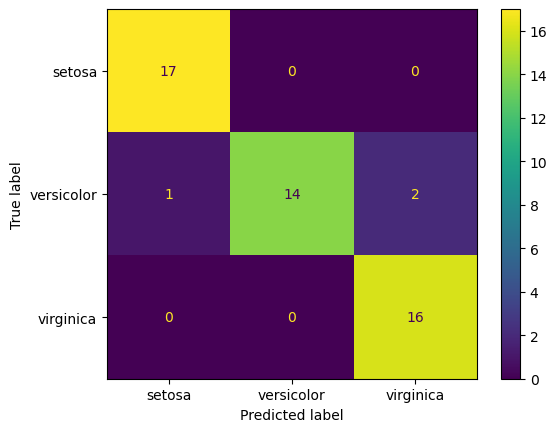

In [24]:
# Evaluate the cascade classifier on the test data
two_stage_predictions = []
correct = 0
for i in range (test_X.shape[0]):
    pred = CascadePredict(test_X[i], setosa_classifier, versicolor_classifier)
    two_stage_predictions.append(pred)

    if pred == test_y[i]:
        correct += 1

# Calculate the accuracy
accuracy = 100 * (test_y == two_stage_predictions).sum() / test_y.shape[0]
print(f"\nOverall Accuracy = {accuracy:.2f} %")
print(f"Final outcome: {correct} out of {test_X.shape[0]} correct test predictions from Cascaded classifier")



_= ConfusionMatrixDisplay.from_predictions(test_y, two_stage_predictions, display_labels=label_names)
plt.show()

<div class="alert alert-block alert-success" style="color:black"><b>Save and close Jupyter:</b>
    <ol>
        <li>Use the jupyterlab functions to download your work (ask your tutor if you need help with this) and save it somewhere sensible so you can find it easily.</li>
        <li>Shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook)</li>
    </ol>
</div